# Importing the required libraries

In [119]:
# Basic NPV packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# for type casting wrongly defined object feature to datetime
import datetime as dt

from sklearn import tree

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Read the data

In [3]:
df = pd.read_csv('healthcare_fraud_detection.csv')
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,...,1,1,2,1,1,36000,3204,60,70,Yes
1,1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,...,2,1,2,2,2,24000,2136,450,200,Yes
2,2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,...,2,1,2,2,2,19000,1068,100,20,Yes
3,3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,...,1,1,1,1,2,27000,2136,450,160,Yes


In [4]:
df.shape

(558211, 56)

**Interpretation: The data has 558211 observations and 56 variables.**

# Dropping the unnecessary unnamed index column

In [5]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,24000,2136,450,200,Yes


# Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [6]:
df.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

**Interpretation :**

1. From our knowledge, we can say that the independent variables 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD' are date-time object in nature. But here, they are defined as object. So we will change the datatype of those columns so that it will be easy for us to gather more data or more features in our fruther analysis.


2. All the Claim Procedure Codes are object by definition. But, here it is interpreted as float64. So, we will change the datatype of all the ClaimProcedureCodes.


3. From the above output, we see that the data type of Research is 'int64'. But according to our understanding, 'Gender', 'Race', 'State', 'County',  is a categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.


4. By nature, All the Chronic Coditions are categorical vairables as they represent only 'Yes' or 'No' values. So, we will 
type cast those vairables.

In [7]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'] , format = '%Y-%m-%d')
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'] , format = '%Y-%m-%d')
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'] , format = '%Y-%m-%d')
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'] , format = '%Y-%m-%d')
df['DOB'] = pd.to_datetime(df['DOB'] , format = '%Y-%m-%d')
df['DOD'] = pd.to_datetime(df['DOD'] , format = '%Y-%m-%d')

In [8]:
df['ClmProcedureCode_1'] = df['ClmProcedureCode_1'].astype('object')
df['ClmProcedureCode_2'] = df['ClmProcedureCode_2'].astype('object')
df['ClmProcedureCode_3'] = df['ClmProcedureCode_3'].astype('object')
df['ClmProcedureCode_4'] = df['ClmProcedureCode_4'].astype('object')
df['ClmProcedureCode_5'] = df['ClmProcedureCode_5'].astype('object')
df['ClmProcedureCode_6'] = df['ClmProcedureCode_6'].astype('object')

In [9]:
df['Gender'] = df['Gender'].astype('object')
df['Race'] = df['Race'].astype('object')
df['State'] = df['State'].astype('object')
df['County'] = df['County'].astype('object')

In [10]:
df['ChronicCond_Alzheimer'] = df['ChronicCond_Alzheimer'].astype('object')
df['ChronicCond_Heartfailure'] = df['ChronicCond_Heartfailure'].astype('object')
df['ChronicCond_KidneyDisease'] = df['ChronicCond_KidneyDisease'].astype('object')
df['ChronicCond_Cancer'] = df['ChronicCond_Cancer'].astype('object')
df['ChronicCond_ObstrPulmonary'] = df['ChronicCond_ObstrPulmonary'].astype('object')
df['ChronicCond_Depression'] = df['ChronicCond_Depression'].astype('object')
df['ChronicCond_Diabetes'] = df['ChronicCond_Diabetes'].astype('object')
df['ChronicCond_IschemicHeart'] = df['ChronicCond_IschemicHeart'].astype('object')
df['ChronicCond_Osteoporasis'] = df['ChronicCond_Osteoporasis'].astype('object')
df['ChronicCond_rheumatoidarthritis'] = df['ChronicCond_rheumatoidarthritis'].astype('object')
df['ChronicCond_stroke'] = df['ChronicCond_stroke'].astype('object')

In [11]:
df.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


**Interpretation: Now, all the variables have the correct data type.**

# Distribution of Variables

# Univariate Analysis :

### Distribution of Numerical Variables :

##### 1. Distribution of numeric independent variables.

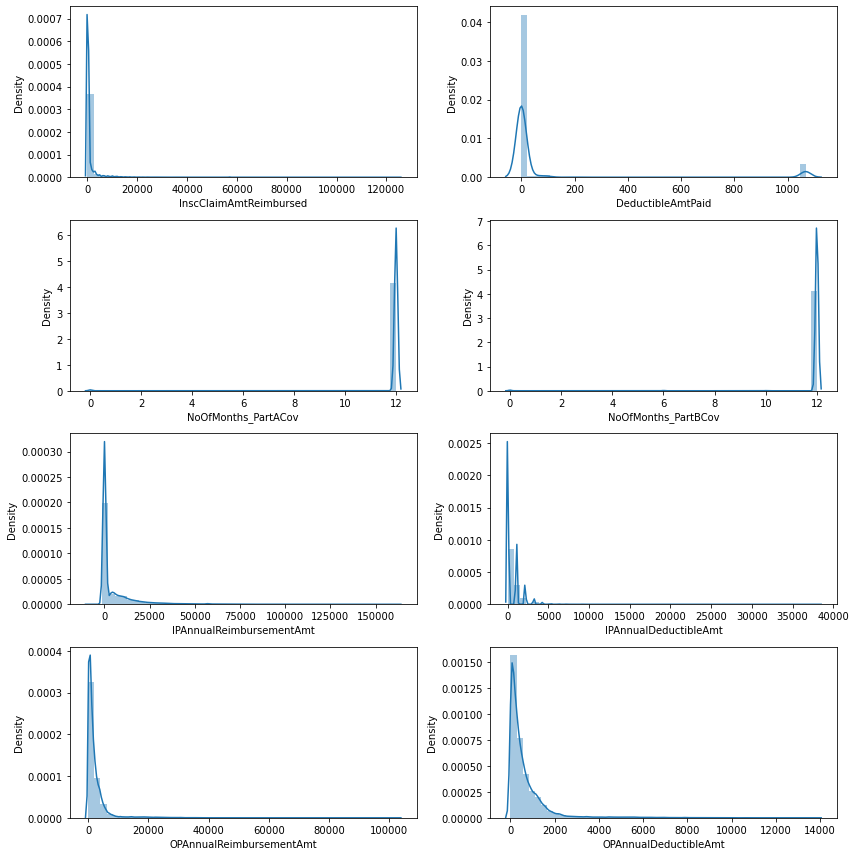

In [12]:
df_num = df.select_dtypes('number')

# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(12,12))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.distplot(df_num[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation: The above plot indicates that all the variables are either right or left skewed. We might need to do scaling or transformation.**

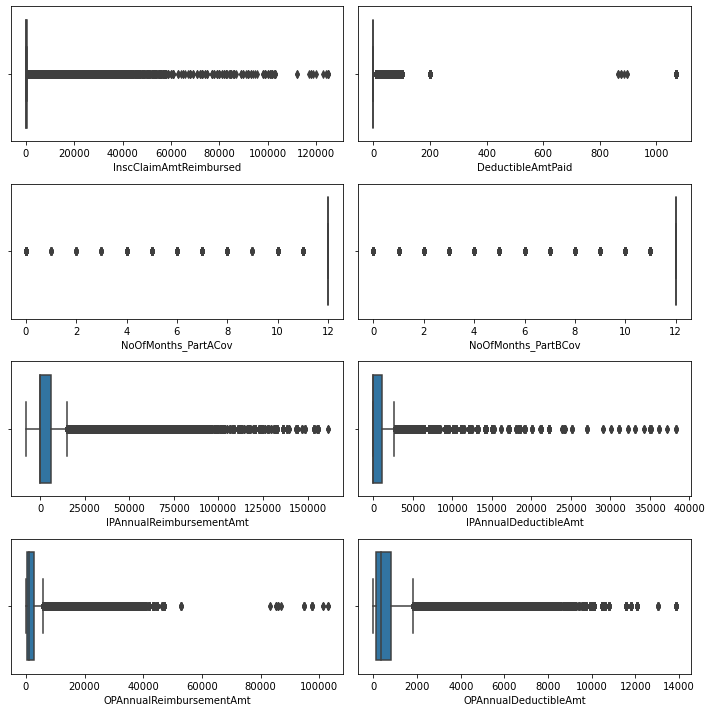

In [14]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(10,10))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_num[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### Distribution of Categorical Variable :

##### 1. Distribution of categoric independent variable :

In [15]:
df['ClaimID'].nunique()

558211

**Interpretation : As 'BeneID', 'ClaimID', 'Provider', 'County' are basically representing the beneficiary id, claim id and provider id respectively. We are not going to keep those variables for our univariate analysis.**


In [16]:
df_cat = df.select_dtypes('object')
# Dropping the above columns and target Variable 'PotentialFraud' 
df_cat1 = df_cat.drop(['BeneID','ClaimID','Provider'],axis = 1)

**Interpretation : We will extract 'Gender','Race','RenalDiseaseIndicator','State' and all the chronic conditions from the categorical variables to do our univariate analysis as other variables have high number of categories present in them,so it will be hard to interpret from such congested graphs.**

In [17]:
df_cat1 = df_cat1[['Gender','Race','RenalDiseaseIndicator','State','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
        'ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
        'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']]

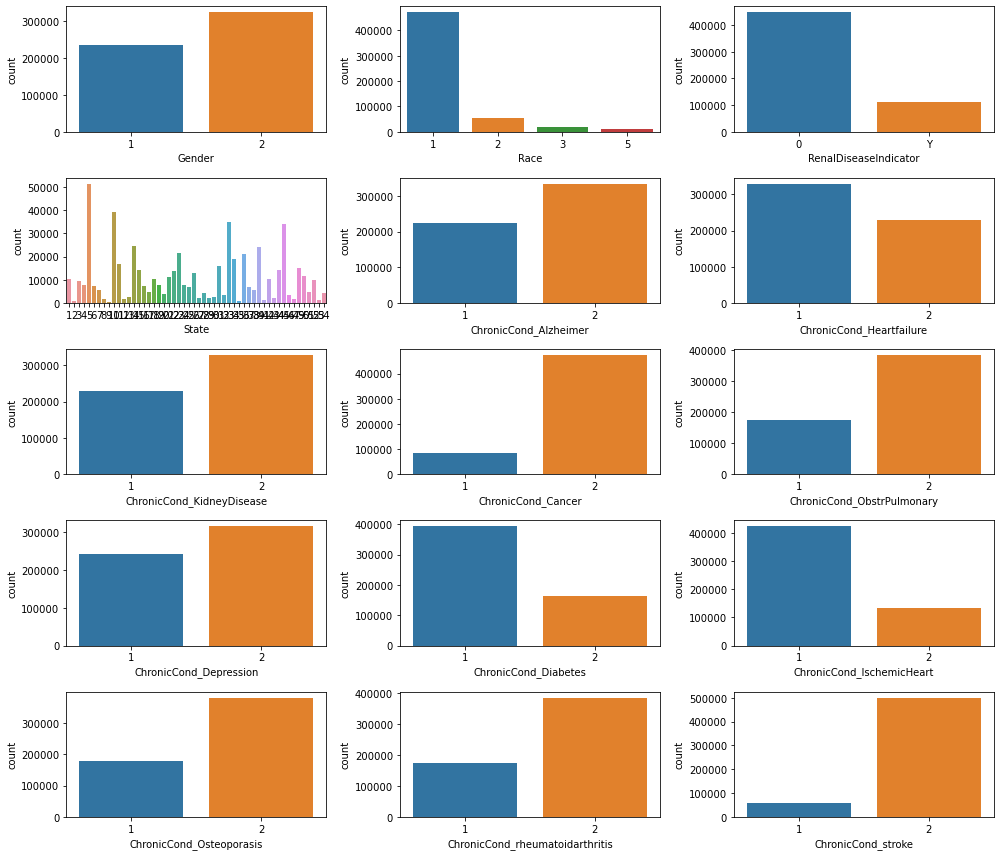

In [18]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(14,12))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_cat1.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_cat1[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

##### 2. Distribution of categoric target/dependent variable :

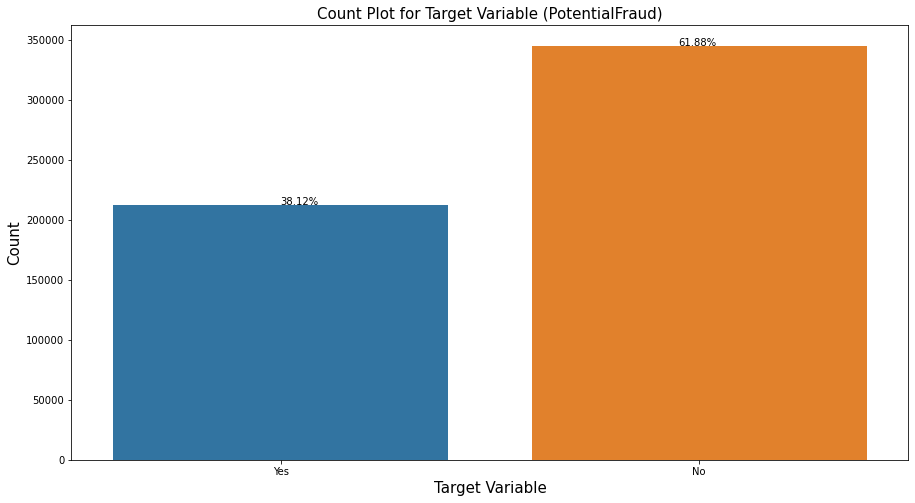

In [19]:
# consider only the target variable
df_target = df_cat['PotentialFraud'].copy()

# get counts of Yes's and No's in the 'PotentialFraud' variable
df_target.value_counts()

# plot the countplot of the variable 'PotentialFraud'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.0, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (PotentialFraud)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation: The above plot shows that there is not that much imbalance in the target variable.**

# Bivariate Analysis :

### 1. Numerical Vairables:

In [20]:
df_num_bi = pd.concat([df_num,df[['PotentialFraud']]],axis = 1)

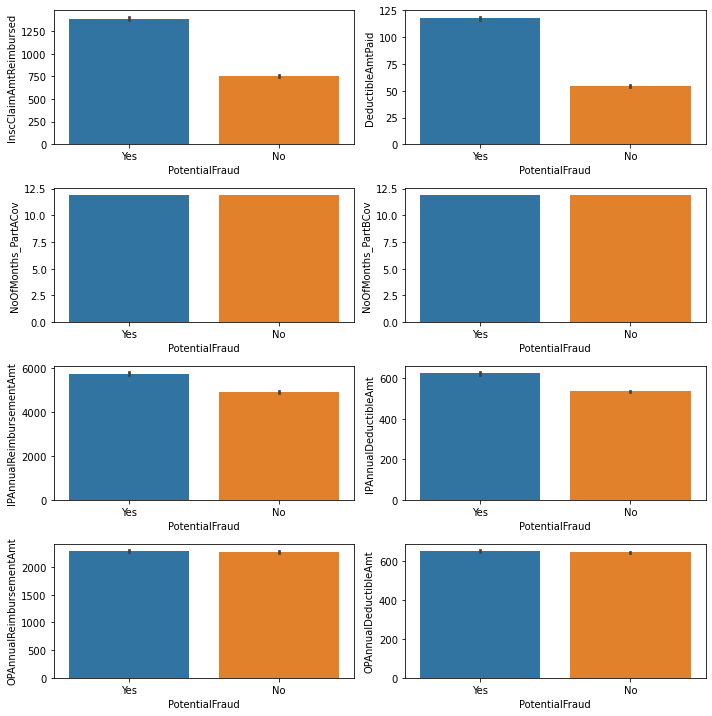

In [21]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(10,10))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num_bi.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.barplot(y = df_num_bi[variable],x = df_num_bi['PotentialFraud'], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

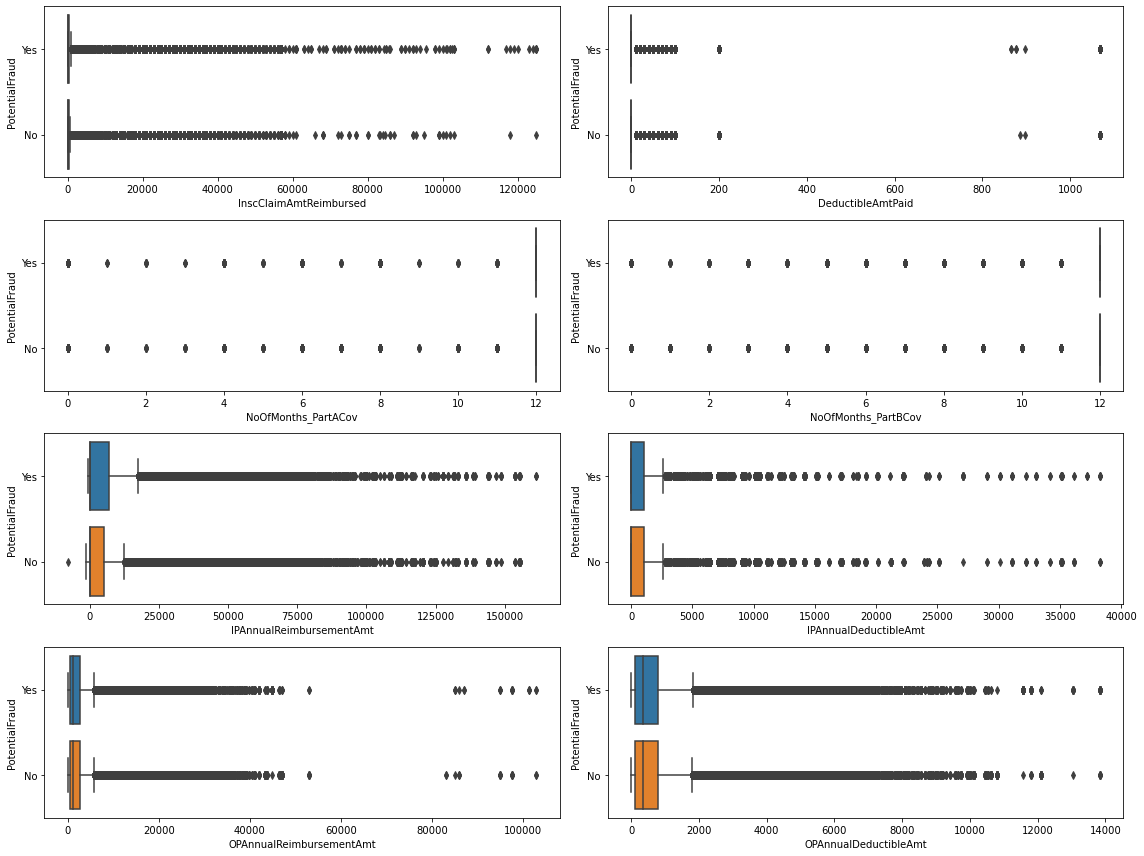

In [22]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(16,12))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num_bi.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(x = df_num_bi[variable],y = df_num_bi['PotentialFraud'], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### 2. Categorical Vairables:

In [23]:
df_cat_bi = pd.concat([df_cat1,df[['PotentialFraud']]],axis = 1)

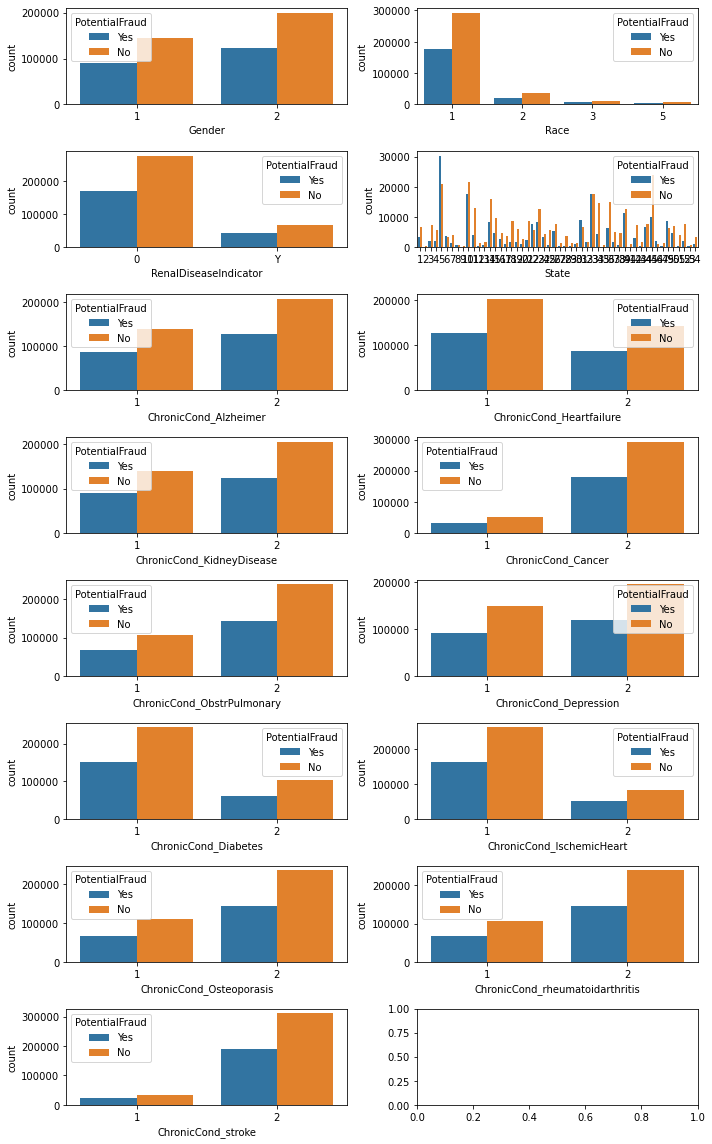

In [24]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(10,16))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_cat1.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(x = df_cat_bi[variable],hue = df_cat_bi['PotentialFraud'] , ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# Multivariate Analysis:

In [25]:
df_num_bi.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

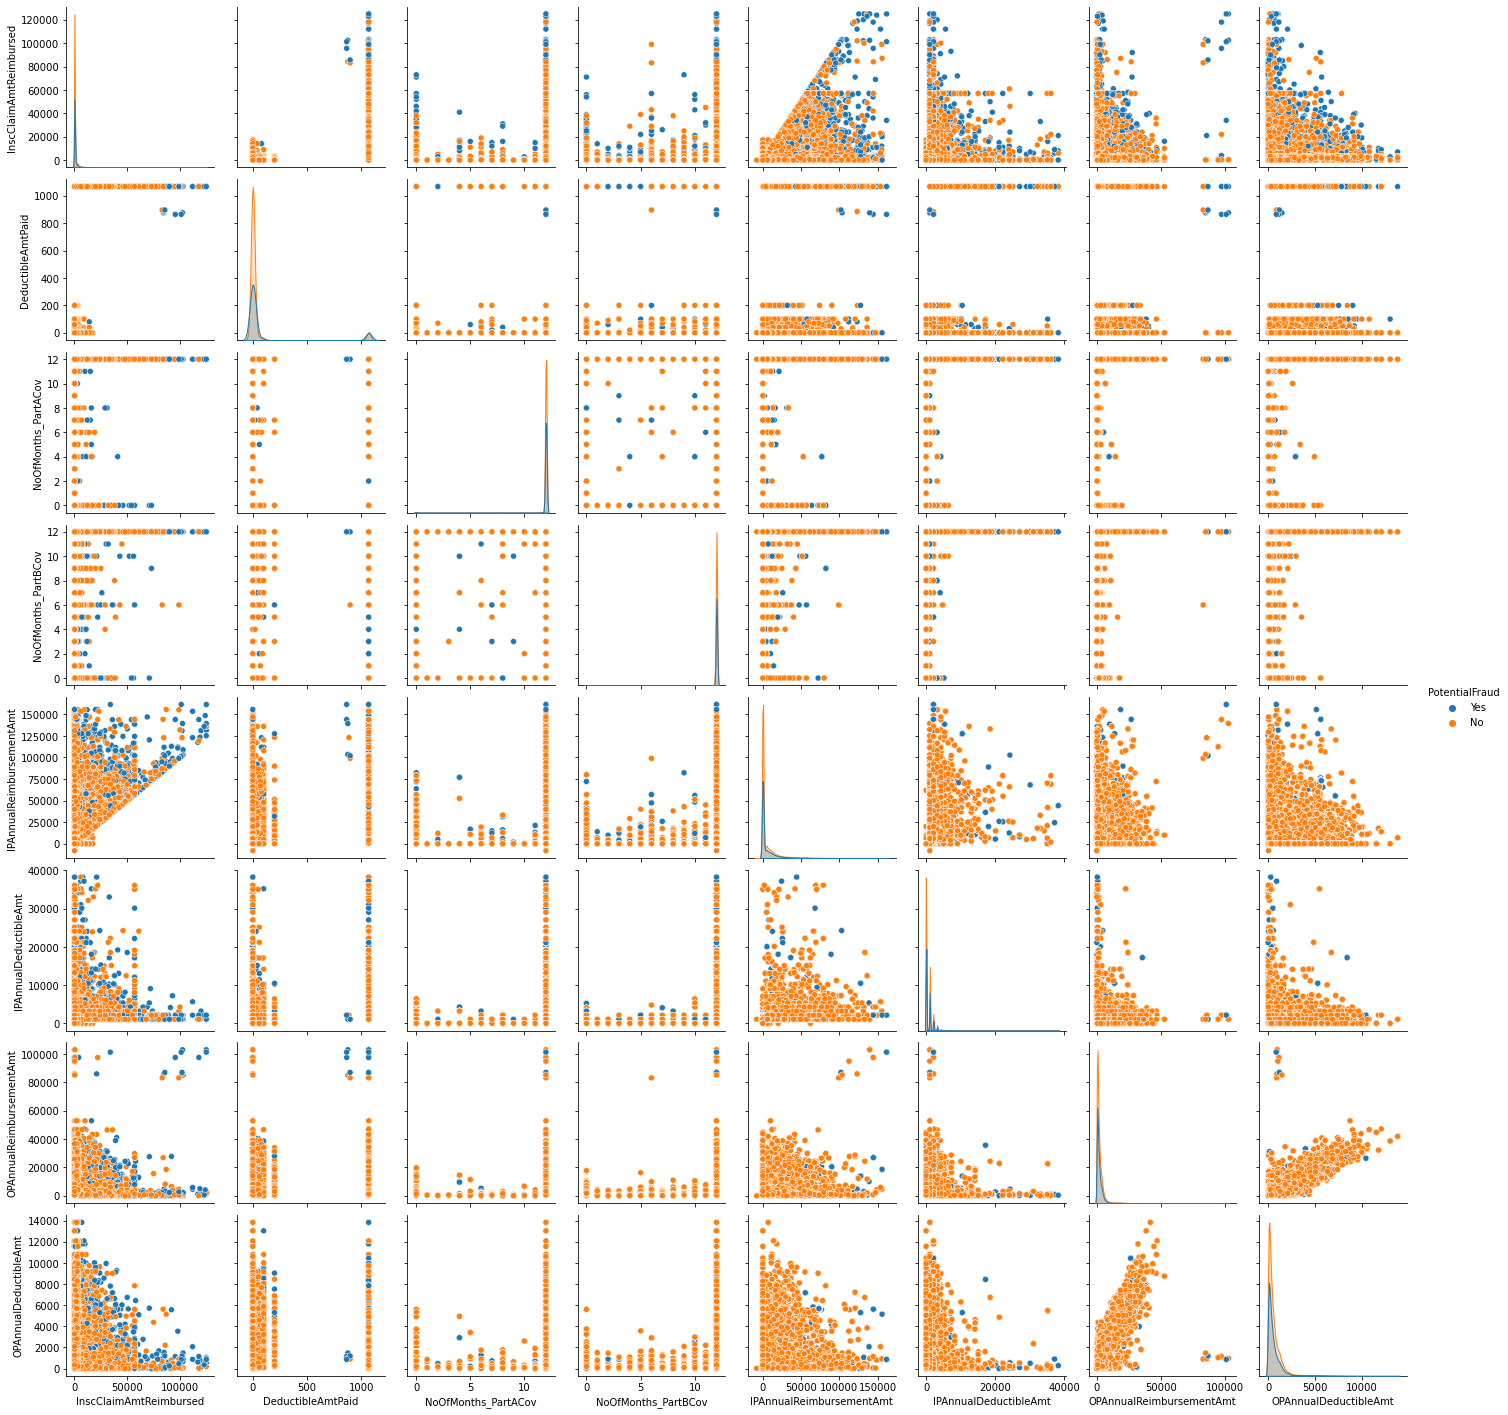

In [26]:
sns.pairplot(data = df_num_bi,vars = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],hue = 'PotentialFraud')

<AxesSubplot:>

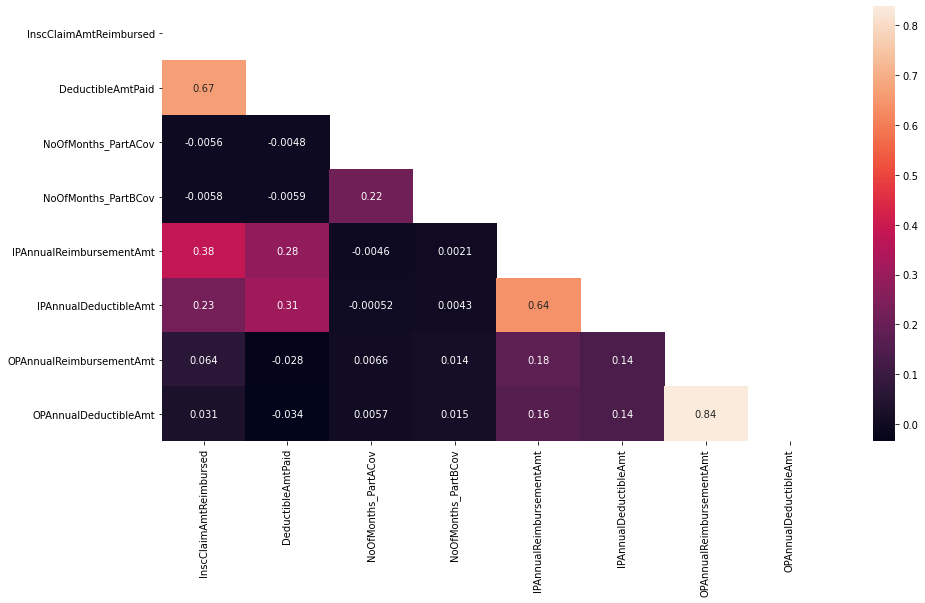

In [27]:
cor = df_num_bi.drop(['PotentialFraud'],axis = 1).corr('pearson')

sns.heatmap(cor,mask = np.triu(cor),annot = True)

# Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [28]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total Missing Values', 'Percentage of Missing Values'])    

# Checking for duplicates in each column
for i in missing_data.index:
    missing_data.loc[i,'Duplicated'] = df[i].duplicated().any()
    
missing_data

,Total Missing Values,Percentage of Missing Values,Duplicated
ClmProcedureCode_6,558211,100.000000,True
ClmProcedureCode_5,558202,99.998388,True
ClmProcedureCode_4,558093,99.978861,True
ClmProcedureCode_3,557242,99.826410,True
DOD,554080,99.259957,True
ClmDiagnosisCode_10,553201,99.102490,True
ClmProcedureCode_2,552721,99.016501,True
ClmProcedureCode_1,534901,95.824160,True
AdmissionDt,517737,92.749337,True
DischargeDt,517737,92.749337,True


In [29]:
missing_data.to_csv('Missing.csv')

In [30]:
df1 = df.copy()

**Interpretation : We can see that there are missing values present in 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'. But, instead of treating those missing values, we will count the total number of physicians for each claim records and create a new feature named 'TotalPhysicianCount'.**


**Also, we will count the total number of unique physicians for each claim records and store it in a new feature named 'UniquePhysicianCount'. Now, we will substract the 'TotalPhysicianCount' and 'UniquePhysicianCount' and store it in a new variable called 'RepeatedPhysician'. Now, we will check if a claim record is having atleast one repreated physician or not for different procedures and store it in the same column named 'RepeatedPhysician'. Basically, 'RepeatedPhysician' will store 'Yes' and 'No' values.**

In [31]:
df1['TotalPhysicianCount'] = df1[['AttendingPhysician','OperatingPhysician','OtherPhysician']].count(axis = 1)

In [32]:
df1['UniquePhysicianCount'] = df1[['AttendingPhysician','OperatingPhysician','OtherPhysician']].nunique(axis = 1)

TotalPhysicianCount - UniquePhysicianCount will give me repeated physician count.

In [33]:
df1['RepeatedPhysician'] = df1['TotalPhysicianCount'] - df1['UniquePhysicianCount']

If the RepeatedPhysician count is 0, then it will take 'no'(Here, we are representing 'no' with 0) and if the RepeatedPhysician count is more than 0, then it will take 'yes'(Here, we are representing 'Yes' with 1)

In [34]:
df1.loc[df1['RepeatedPhysician'] == 0,'RepeatedPhysician'] = 0 # No
df1.loc[df1['RepeatedPhysician'] > 0,'RepeatedPhysician'] = 1 # Yes

**Interpretation : Now, we will retain only two features 'TotalPhysicianCount' and 'RepeatedPhysician' out of all the features we have worked with and drop the rest of them.**

In [35]:
df1.drop(['AttendingPhysician','OperatingPhysician','OtherPhysician','UniquePhysicianCount'],axis = 1,inplace = True)

**Interpretation : All the Claim Diagnosis Codes and the Claim Procedure Codes are basically the diagnosis codes and procedure codes each patient has gone through for each claim records. So we are going to count the Diagnosis Codes for each claim and store it in a new variable 'ClmDiagnosisCount' and also count the Procedure Codes for each claim and store it in a new variable 'ClmProcedureCount'. After that, we will drop all the Diagnosis and Procedure codes.**

In [36]:
df1['ClmDiagnosisCount'] = df1[['ClmAdmitDiagnosisCode','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']].count(axis = 1)

In [37]:
df1['ClmProcedureCount'] = df1[['ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']].count(axis = 1)

In [38]:
df1.drop(['ClmAdmitDiagnosisCode','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],axis = 1,inplace = True)

**Interpretation : Diagnosis Group Code is also present in Inpatient Data only. So for other outpatient datas, we can impute that feature with 0.**

In [39]:
df1['DiagnosisGroupCode'].fillna(value = 0,inplace = True)

**Interpretation : There are null values present in the 'DOD' column. It means that the patient is alive till the dataset was recorded. So we will create a new columns 'Age' after substracting 'DOD' and 'DOB' and count the total days and divide it by 365 to get that person's age. There will be null values in the Age column because most of the patients are alive. So, we will fill those null values after calculating the age from their 'DOB' and max value of 'DOD'(max value of 'DOD' is almost similar to the last record of the dataset)**


**Also, based on the null values in 'DOD', we will be creating a new feature named 'Alive' which will take two values '0'(no, the person is not alive) and '1'(yes, the person is alive).**

In [40]:
df1['Age'] = round(((df1['DOD']-df1['DOB']).dt.days)/365)

In [41]:
df1['Age'].fillna(value = round((df1['DOD'].max()-df1['DOB']).dt.days/365),inplace = True)

In [42]:
df1.loc[df1['DOD'].notnull(),'Alive'] = 0 # No
df1.loc[df1['DOD'].isnull(),'Alive'] = 1 # Yes

In [43]:
df1.drop(['DOB','DOD'],axis = 1,inplace = True)

**Interpretation : We can see that the features 'AdmissinDt' and 'DischargeDt' has 92 % of missing values. 'AdmissionDt' and 'DischargeDt' is basically avaialble for inpatient data. So based on that, we will be creating a new feature 'PatientVisitType' which will take only two values 1 (Inpatient/The beneficiary admitted in the hospital) and 0 (Outpatient/The beneficiary came for outdoor check-up).**


**We will also be creating a new feature 'DaysStayedAtHospital' taking the difference in days between 'AdmissionDt' and 'DischargeDt'. There will be null values for those patient who didn't admit in the hospital(outpatients). We will fill those null values with 0 as they haven't stayed at the hospital. Then we will drop those two columns 'AdmissionDt' and 'DischargeDt'.**

In [54]:
df1.loc[df1['DischargeDt'].isnull(),'PatientType'] = 0 # Outpatient
df1.loc[df1['DischargeDt'].notnull(),'PatientType'] = 1 # Inpatient

In [55]:
df1['DaysStayedAtHospital'] = (df1['DischargeDt'] - df1['AdmissionDt']).dt.days

In [56]:
df1.drop(['AdmissionDt','DischargeDt'],axis = 1,inplace = True)

In [58]:
df1['DaysStayedAtHospital'].fillna(value = 0,inplace = True)

In [59]:
df1.isnull().sum()/len(df1)*100

BeneID                             0.00000
ClaimID                            0.00000
ClaimStartDt                       0.00000
ClaimEndDt                         0.00000
Provider                           0.00000
InscClaimAmtReimbursed             0.00000
DeductibleAmtPaid                  0.16105
DiagnosisGroupCode                 0.00000
Gender                             0.00000
Race                               0.00000
RenalDiseaseIndicator              0.00000
State                              0.00000
County                             0.00000
NoOfMonths_PartACov                0.00000
NoOfMonths_PartBCov                0.00000
ChronicCond_Alzheimer              0.00000
ChronicCond_Heartfailure           0.00000
ChronicCond_KidneyDisease          0.00000
ChronicCond_Cancer                 0.00000
ChronicCond_ObstrPulmonary         0.00000
ChronicCond_Depression             0.00000
ChronicCond_Diabetes               0.00000
ChronicCond_IschemicHeart          0.00000
ChronicCond

**Interpretation : We can see that there are 0.161% missing values present in the feature 'DeductibleAmtPaid'. We will fill the null values with 0 as some of the beneficiaries' medical expense is so low that they don't reach till the deductible amount level.**

In [60]:
df1['DeductibleAmtPaid'].fillna(value = 0,inplace = True)

**Interpretation : We will also be creating a new feature 'DaysToSettleClaim' taking the difference in days between 'ClaimStartDt' and 'ClaimEndDt' and also drop those two columns.**

In [64]:
df1['DaysToSettleClaim'] = (df1['ClaimStartDt'] - df1['ClaimEndDt']).dt.days

In [65]:
df1.drop(['ClaimStartDt','ClaimEndDt'],axis = 1,inplace = True)

# Encoding of Categorical Variable

In [68]:
for i in ['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    print(df1[i].value_counts())
    print()
    print()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64


2    333884
1    224327
Name: ChronicCond_Alzheimer, dtype: int64


1    329583
2    228628
Name: ChronicCond_Heartfailure, dtype: int64


2    328227
1    229984
Name: ChronicCond_KidneyDisease, dtype: int64


2    473706
1     84505
Name: ChronicCond_Cancer, dtype: int64


2    383530
1    174681
Name: ChronicCond_ObstrPulmonary, dtype: int64


2    315497
1    242714
Name: ChronicCond_Depression, dtype: int64


1    393759
2    164452
Name: ChronicCond_Diabetes, dtype: int64


1    423830
2    134381
Name: ChronicCond_IschemicHeart, dtype: int64


2    380897
1    177314
Name: ChronicCond_Osteoporasis, dtype: int64


2    384512
1    173699
Name: ChronicCond_rheumatoidarthritis, dtype: int64


2    501430
1     56781
Name: ChronicCond_stroke, dtype: int64




**Interpretation : After checking all the value counts of the renal disease and chronic conditions, There are redundant values we can say. We will encode them prooperly. 'Y'(yes) in 'RenalDiseaseIndicator' will be encoded as 1. Also, practically, if we see the value counts in the chronic conditions, we can see that there are 2 values 1 and 2. Basically, 2 is representing 0 (Chronic Condition not present) and we will keep 1(yes chronic condition present) as it is.**

In [74]:
d1 = {'Y':1,
      2:0}

df1[['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']] = df1[['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']].replace(d1)

In [76]:
df1['TotalDiseaseCount'] = df1['RenalDiseaseIndicator']+df1['ChronicCond_Alzheimer']+df1['ChronicCond_Heartfailure']+df1['ChronicCond_KidneyDisease']+df1['ChronicCond_Cancer']+df1['ChronicCond_ObstrPulmonary']+df1['ChronicCond_Depression']+df1['ChronicCond_Diabetes']+df1['ChronicCond_IschemicHeart']+df1['ChronicCond_Osteoporasis']+df1['ChronicCond_rheumatoidarthritis']+df1['ChronicCond_stroke']

In [77]:
df1.drop(['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'],axis = 1,inplace = True)

In [78]:
df1.isnull().sum()

BeneID                      0
ClaimID                     0
Provider                    0
InscClaimAmtReimbursed      0
DeductibleAmtPaid           0
DiagnosisGroupCode          0
Gender                      0
Race                        0
State                       0
County                      0
NoOfMonths_PartACov         0
NoOfMonths_PartBCov         0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
PotentialFraud              0
TotalPhysicianCount         0
RepeatedPhysician           0
ClmDiagnosisCount           0
ClmProcedureCount           0
Age                         0
Alive                       0
PatientType                 0
DaysStayedAtHospital        0
DaysToSettleClaim           0
TotalDiseaseCount           0
dtype: int64

**Interpretation : Now, we will encode the target variable 'PotentialFraud' as needed for our future model evaluation. Basically, there are two values present in the target variable 'Yes' and 'No'. We will encode them with 1 and 0 respectively.**

In [85]:
d2 = {'Yes':1,
      'No':0}
df1['PotentialFraud'].replace(d2,inplace = True)

**Interpretation : Now we will change the data types of some object variables 'Gender','Race','State','County' as they are already encoded.**

In [89]:
df1['Gender'] = df1['Gender'].astype('int64')
df1['Race'] = df1['Race'].astype('int64')
df1['State'] = df1['State'].astype('int64')
df1['County'] = df1['County'].astype('int64')

In [90]:
df1.dtypes

BeneID                       object
ClaimID                      object
Provider                     object
InscClaimAmtReimbursed        int64
DeductibleAmtPaid           float64
DiagnosisGroupCode           object
Gender                        int64
Race                          int64
State                         int64
County                        int64
NoOfMonths_PartACov           int64
NoOfMonths_PartBCov           int64
IPAnnualReimbursementAmt      int64
IPAnnualDeductibleAmt         int64
OPAnnualReimbursementAmt      int64
OPAnnualDeductibleAmt         int64
PotentialFraud                int64
TotalPhysicianCount           int64
RepeatedPhysician             int64
ClmDiagnosisCount             int64
ClmProcedureCount             int64
Age                         float64
Alive                       float64
PatientType                 float64
DaysStayedAtHospital        float64
DaysToSettleClaim             int64
TotalDiseaseCount             int64
dtype: object

In [93]:
df1[df1['Diag']]

0        517746
882         166
166         154
887         153
884         152
          ...  
159.0         1
548.0         1
27.0          1
549.0         1
775           1
Name: DiagnosisGroupCode, Length: 1389, dtype: int64

**Interpretation : We can say that the feature 'DiagnosisGroupCode' is representing only an ID for the diagnosis done on the inpatient data. We have already extracted required features from the diagnosis done on the patients. So we will drop it.**

In [97]:
df1.shape

(558211, 23)

**Interpretation : We can say that the features 'BeneID','ClaimID','Provider' are working as ID only. We have already created new features based on those columns. So we will drop those features for model building now and will add if needed for later.**

In [95]:
df1.drop(['BeneID','ClaimID','Provider','DiagnosisGroupCode'],inplace = True,axis = 1)

In [100]:
X = df1.drop(['PotentialFraud'],axis = 1)
y = df1['PotentialFraud']

In [99]:
from sklearn.model_selection import train_test_split

In [104]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8,random_state=100)

In [128]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('Xtrain', Xtrain.shape)
print('ytrain', ytrain.shape)

# print dimension of test set
print('Xtest', Xtest.shape)
print('ytest', ytest.shape)

Xtrain (446568, 22)
ytrain (446568,)
Xtest (111643, 22)
ytest (111643,)


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,f1_score,cohen_kappa_score
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
lr_pred_train = lr.predict(Xtrain)
lr_pred_test = lr.predict(Xtest)

print('Train Accuracy :',accuracy_score(lr_pred_train,ytrain))
print('Test Accuracy :',accuracy_score(lr_pred_test,ytest))

Train Accuracy : 0.6296465487898819
Test Accuracy : 0.630939691695852


In [133]:
cm = confusion_matrix(lr_pred_test,ytest)
TN = cm[0][0]
FP = cm[0][1]

FN = cm[1][0]
TP = cm[1][1]

Recall = TP/(FN+TP)
print(Recall)

0.5724120346761856


In [125]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 100)
decision_tree = dt.fit(Xtrain,ytrain)
dt_pred_train = dt.predict(Xtrain)
dt_pred_test = dt.predict(Xtest)

print('Train Accuracy :',accuracy_score(dt_pred_train,ytrain))
print('Test Accuracy :',accuracy_score(dt_pred_test,ytest))

Train Accuracy : 0.9974763081994231
Test Accuracy : 0.6995064625637075


In [108]:
from sklearn.model_selection import cross_val_score

scoresdt = cross_val_score(dt,Xtrain,ytrain,cv = 10,scoring = 'accuracy')
print(scoresdt)
print()
print('Acuracy Score :',np.mean(scoresdt))

[0.69765098 0.69718073 0.69585955 0.69711355 0.69805406 0.69814363
 0.69514298 0.69709116 0.69773379 0.69782336]

Acuracy Score : 0.6971793796205477


In [109]:
scoresdt = cross_val_score(dt,Xtrain,ytrain,cv = 10,scoring = 'roc_auc')
print(scoresdt)
print()
print('Roc Auc Score :',np.mean(scoresdt))

[0.6814965  0.6809555  0.67984033 0.6810166  0.68186362 0.68096195
 0.67883408 0.68026023 0.68112997 0.68164819]

Acuracy Score : 0.680800696199358


In [110]:
scoresdt = cross_val_score(dt,Xtrain,ytrain,cv = 10,scoring = 'f1')
print(scoresdt)
print()
print('F1 Score :',np.mean(scoresdt))

[0.60630977 0.60529465 0.60469177 0.60556398 0.60644446 0.60485431
 0.60288198 0.60376695 0.60529856 0.60645124]

F1 Score : 0.605155767152378


In [140]:
print('Train Accuracy :',accuracy_score(dt_pred_train,ytrain))
print('Test Accuracy :',accuracy_score(dt_pred_test,ytest))
print('ROC :',roc_auc_score(dt_pred_test,ytest))
print('F1 :',f1_score(dt_pred_test,ytest))
print('Kappa :',cohen_kappa_score(dt_pred_test,ytest))

Train Accuracy : 0.9974763081994231
Test Accuracy : 0.6995064625637075
ROC : 0.6811199669916194
F1 : 0.6054476172554922
Kappa : 0.36280645367685105


In [115]:
df1['PotentialFraud'].value_countscounts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 100)
decision_tree = rf.fit(Xtrain,ytrain)
rf_pred_train = rf.predict(Xtrain)
rf_pred_test = rf.predict(Xtest)

print('Train Accuracy :',accuracy_score(rf_pred_train,ytrain))
print('Test Accuracy :',accuracy_score(rf_pred_test,ytest))
print('ROC :',roc_auc_score(rf_pred_test,ytest))
print('F1 :',f1_score(rf_pred_test,ytest))
print('Kappa :',cohen_kappa_score(rf_pred_test,ytest))

Train Accuracy : 0.9974763081994231
Test Accuracy : 0.7375473607839274
ROC : 0.7242827106458971
F1 : 0.6179044141618308
Kappa : 0.42132395706771375


In [139]:
cm = confusion_matrix(rf_pred_test,ytest)
TN = cm[0][0]
FP = cm[0][1]

FN = cm[1][0]
TP = cm[1][1]

Recall = TP/(FN+TP)
print(Recall)

0.6898037617189775


In [141]:
print(classification_report(rf_pred_test,ytest))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     77297
           1       0.56      0.69      0.62     34346

    accuracy                           0.74    111643
   macro avg       0.70      0.72      0.71    111643
weighted avg       0.76      0.74      0.74    111643



In [136]:
scoresrf = cross_val_score(rf,Xtrain,ytrain,cv = 10,scoring = 'recall')
print(scoresrf)
print()
print('Recall :',np.mean(scoresrf))

[0.55887357 0.55438226 0.54939575 0.55350229 0.56118738 0.55074504
 0.55784348 0.55508624 0.55793488 0.55699619]

Recall : 0.5555947072898908


In [ ]:
scoresrf = cross_val_score(rf,Xtrain,ytrain,cv = 10,scoring = 'f1')
print(scoresrf)
print()
print('Accuracy Score :',np.mean(scoresrf))

In [ ]:
scoresrf = cross_val_score(rf,Xtrain,ytrain,cv = 10,scoring = 'roc_auc')
print(scoresrf)
print()
print('Accuracy Score :',np.mean(scoresrf))